In [5]:
# Import Relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

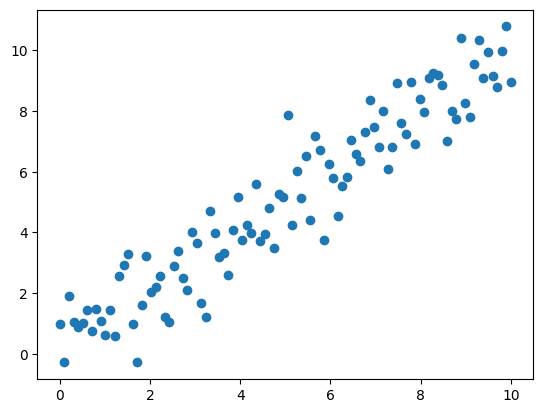

In [20]:
# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# plot of data
plt.scatter(x_train, y_train)

In [21]:
x_train

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [22]:
y_train

array([ 0.99245469, -0.27978506,  1.9120047 ,  1.0669467 ,  0.88802651,
        1.02783244,  1.44848473,  0.75230876,  1.47945376,  1.08600644,
        0.62670727,  1.44264823,  0.60290618,  2.55105052,  2.91605117,
        3.28550025,  0.99466277, -0.27462175,  1.59693737,  3.22912418,
        2.04985058,  2.20718069,  2.56517102,  1.21071918,  1.06047867,
        2.89592749,  3.39805508,  2.49657751,  2.10987998,  4.01808428,
        3.66787809,  1.67660498,  1.22311461,  4.70024633,  3.98679653,
        3.20058936,  3.34002183,  2.58744174,  4.07012702,  5.18324575,
        3.75834927,  4.2517056 ,  3.98466149,  5.59485763,  3.71667007,
        3.95275351,  4.79088238,  3.47456638,  5.25108605,  5.16163185,
        7.85115298,  4.24935152,  6.00965165,  5.13806299,  6.50163776,
        4.42672622,  7.16268057,  6.72964072,  3.76599911,  6.26692027,
        5.78795072,  4.52648889,  5.5405189 ,  5.82540777,  7.04206539,
        6.57822198,  6.3508463 ,  7.3121488 ,  8.37198755,  7.46

In [23]:
# declare weights
a = tf.Variable(0.)
b = tf.Variable(0.)

In [24]:
# Define linear regression expression y
def linreg(x):
    y = a*x + b
    return y

In [25]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [26]:
# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [a,b])

        # Adjust weights
        a.assign_sub(gradients[0]*learning_rate)
        b.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 34.551082611083984
Epoch count 1: Loss value: 4.2321085929870605
Epoch count 2: Loss value: 1.225008249282837
Epoch count 3: Loss value: 0.9267320036888123
Epoch count 4: Loss value: 0.8971199989318848
Epoch count 5: Loss value: 0.8941547274589539
Epoch count 6: Loss value: 0.8938325643539429
Epoch count 7: Loss value: 0.8937729001045227
Epoch count 8: Loss value: 0.8937394022941589
Epoch count 9: Loss value: 0.8937088251113892
Epoch count 10: Loss value: 0.8936787247657776
Epoch count 11: Loss value: 0.893649160861969
Epoch count 12: Loss value: 0.8936197757720947
Epoch count 13: Loss value: 0.8935906887054443
Epoch count 14: Loss value: 0.893561840057373
Epoch count 15: Loss value: 0.8935333490371704
Epoch count 16: Loss value: 0.8935051560401917
Epoch count 17: Loss value: 0.893477201461792
Epoch count 18: Loss value: 0.8934494853019714
Epoch count 19: Loss value: 0.8934220671653748
Epoch count 20: Loss value: 0.8933950066566467
Epoch count 21: Loss value:

In [27]:
print(a.numpy())
print(b.numpy())


0.97350574
0.19215864


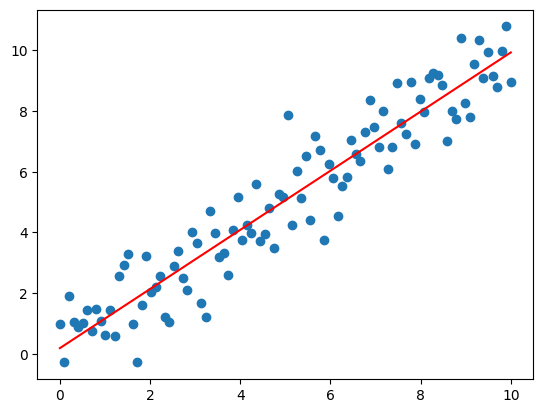

In [28]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()